In [1]:
import torch
from torch import nn
from collections import OrderedDict
import sys
import torch.optim as optim
import numpy as np
import sys
sys.path.append('../')
import model_utils as mu
import matplotlib.pyplot as plt

In [2]:
x = torch.Tensor([[1.0]])
y = torch.Tensor([[2.0]])
lr = 0.1
n_epochs = 250
gamma = 1e-12  # Initialization scale

SEED = 2021
mu.set_seed(seed=SEED)

def train(model, inputs, targets, lr, mask=None, print_grad=False):
    in_dim = inputs.size(1)

    losses = np.zeros(n_epochs)
    optimizer = optim.SGD(model.parameters(), lr=lr)
    criterion = nn.MSELoss()

    for i in range(n_epochs):
        optimizer.zero_grad()
        if mask is None:
            predictions = model(inputs)
        else:
            predictions = model(inputs, mask)
        loss = criterion(predictions, targets)
        loss.backward()
        optimizer.step()

        losses[i] = loss.item()
        
        if print_grad:
            for p in model.parameters():
                print(p.grad)

    return losses

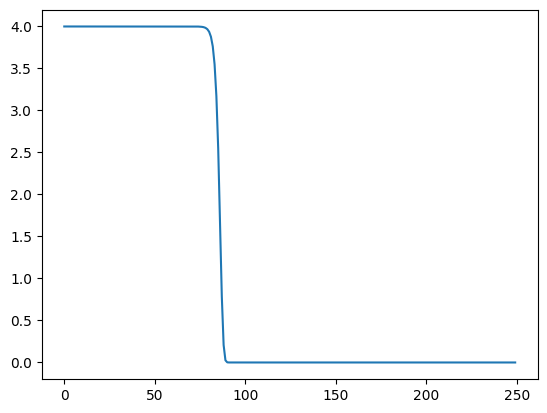

tensor([[-3.3717e-07]])
tensor([[-3.3717e-07]])


In [3]:
class Model1(nn.Module):
    def __init__(self):
        super().__init__()
#         print('Making model 1')
        self.net = nn.Sequential(OrderedDict([('w1', nn.Linear(1,1, bias=False)), 
                                              ('w2', nn.Linear(1,1, bias=False))]))

    def forward(self, x):
        x = self.net.forward(x)
        return x
    
model1 = Model1()

mu.initializer_(model1, gamma)

loss = train(model1, x, y, lr)
plt.plot(loss)
plt.show()

for p in model1.parameters():
    print(p.grad)

Making model 2


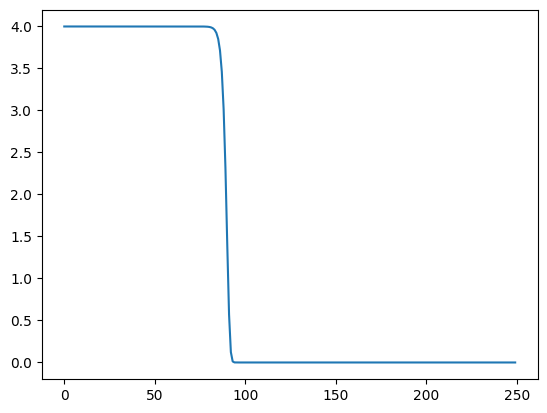

tensor([[-3.3717e-07]])
tensor([[-3.3717e-07]])


In [4]:
class Model2(nn.Module):
    def __init__(self):
        super().__init__()
        print('Making model 2')
        self.net = nn.Sequential(OrderedDict([('w1', nn.Linear(1,1, bias=False)), 
                                              ('w2', nn.Linear(1,1, bias=False))]))

    def forward(self, x):
        for l, layer in enumerate(self.net):
            x = layer(x)
        return x
    
model2 = Model2()

mu.initializer_(model2, gamma)

loss = train(model2, x, y, lr)
plt.plot(loss)
plt.show()

for p in model2.parameters():
    print(p.grad)

tensor([[0.0118]])
tensor([[-0.0136]])
tensor([[0.0091]])
tensor([[0.0113]])
tensor([[-0.0131]])
tensor([[0.0086]])
tensor([[0.0108]])
tensor([[-0.0126]])
tensor([[0.0081]])
tensor([[0.0103]])
tensor([[-0.0122]])
tensor([[0.0077]])
tensor([[0.0099]])
tensor([[-0.0118]])
tensor([[0.0073]])
tensor([[0.0095]])
tensor([[-0.0114]])
tensor([[0.0069]])
tensor([[0.0091]])
tensor([[-0.0111]])
tensor([[0.0066]])
tensor([[0.0087]])
tensor([[-0.0107]])
tensor([[0.0063]])
tensor([[0.0084]])
tensor([[-0.0104]])
tensor([[0.0060]])
tensor([[0.0080]])
tensor([[-0.0101]])
tensor([[0.0057]])
tensor([[0.0077]])
tensor([[-0.0098]])
tensor([[0.0054]])
tensor([[0.0074]])
tensor([[-0.0095]])
tensor([[0.0051]])
tensor([[0.0071]])
tensor([[-0.0093]])
tensor([[0.0049]])
tensor([[0.0069]])
tensor([[-0.0090]])
tensor([[0.0047]])
tensor([[0.0066]])
tensor([[-0.0088]])
tensor([[0.0044]])
tensor([[0.0063]])
tensor([[-0.0086]])
tensor([[0.0042]])
tensor([[0.0061]])
tensor([[-0.0084]])
tensor([[0.0040]])
tensor([[0.005

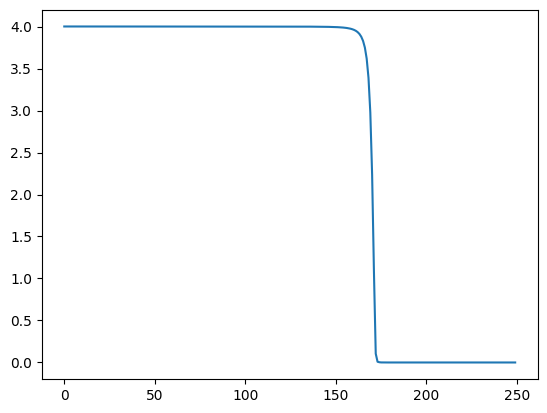

In [5]:
class Model3(nn.Module):
    def __init__(self):
        super().__init__()
#         print('Making model 3')
        self.net = nn.Sequential(OrderedDict([('w1', nn.Linear(1,1, bias=False)), 
                                              ('w2', nn.Linear(1,1, bias=False)),
                                              ('w3', nn.Linear(1,1, bias=False))]))

    def forward(self, x):
        x = self.net.forward(x)
        return x
    
model3 = Model3()

mu.initializer_(model3, gamma*10**11)

loss = train(model3, x, y, lr, print_grad=True)
plt.plot(loss)
plt.show()

Making model 4


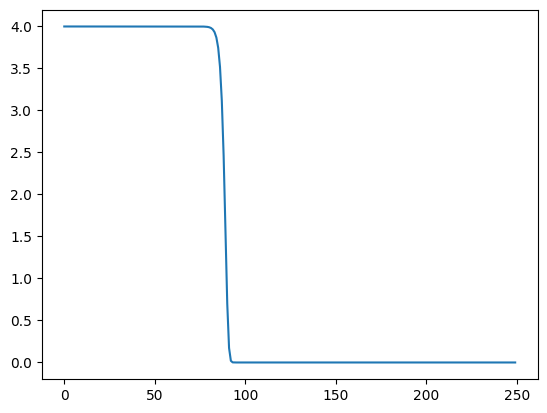

In [6]:
class Model4(nn.Module):
    def __init__(self):
        super().__init__()
        print('Making model 4')
        self.net = nn.Sequential(OrderedDict([('w1', nn.Linear(1,2, bias=False)), 
                                              ('w2', nn.Linear(2,1, bias=False))]))

    def forward(self, x, mask):
        for l, layer in enumerate(self.net):
            x = layer(x)
            if l == 0:
                x = mask * x
        return x
    
model4 = Model4()

mu.initializer_(model4, gamma)

loss = train(model4, x, y, lr, mask=torch.Tensor([[1.,0.]]))
plt.plot(loss)
plt.show()

Making model 5


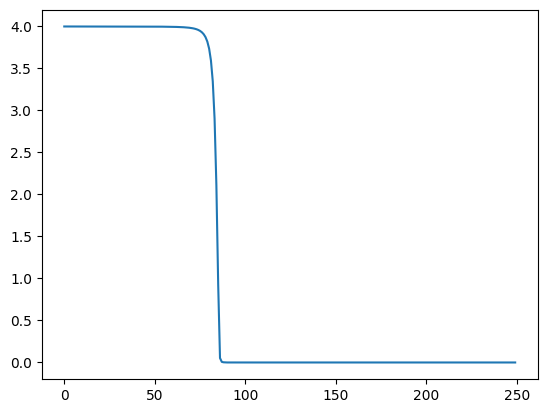

In [7]:
class Model5(nn.Module):
    def __init__(self):
        super().__init__()
        print('Making model 5')
        self.net = nn.Sequential(OrderedDict([('w1', nn.Linear(1,1, bias=False)), 
                                              ('w2', nn.Linear(1,1, bias=False)),
                                              ('w3', nn.Linear(1,1, bias=False)),
                                              ('w4', nn.Linear(1,1, bias=False))]))

    def forward(self, x):
        x = self.net.forward(x)
        return x
    
model5 = Model5()

mu.initializer_(model3, gamma*10**11)

loss = train(model3, x, y, lr)
plt.plot(loss)
plt.show()

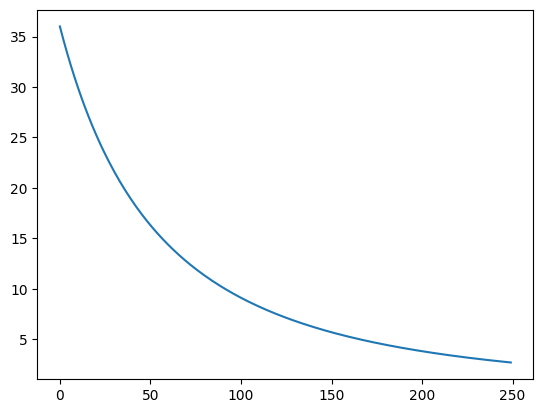

In [8]:
model_comb = Model3()

# mu.initializer_(model_comb, 2)
for weight in model_comb.parameters():
#     nn.init.normal_(weight, mean=0.0, std=sigma)
    weight.data = 2*nn.parameter.Parameter(torch.ones_like(weight))

loss = train(model_comb, x, y, lr=0.0001, print_grad=False)
plt.plot(loss)
plt.show()

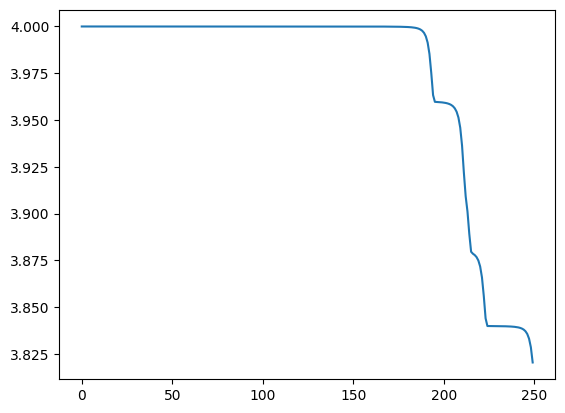

In [40]:
n_ensemble = 100
loss_ens = np.zeros(n_epochs)

for i in range(n_ensemble):
    SEED = 2021 + i
    mu.set_seed(seed=SEED)
    
    model_ens = Model3()
    mu.initializer_(model_ens, gamma * 10**10)

    loss = train(model_ens, x, y, lr=0.1, print_grad=False)
    loss_ens = loss_ens + loss
    
loss_ens /= n_ensemble

plt.plot(loss_ens)

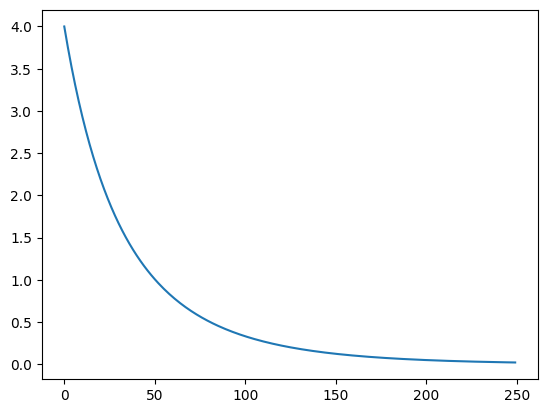

In [12]:
model_comb = Model1()
weight_large = 2

# mu.initializer_(model_comb, 2)
for weight in model_comb.parameters():
#     nn.init.normal_(weight, mean=0.0, std=sigma)
    weight.data = weight_large * nn.parameter.Parameter(torch.ones_like(weight))

loss = train(model_comb, x, y, lr=0.001, print_grad=False)
plt.plot(loss)
plt.show()

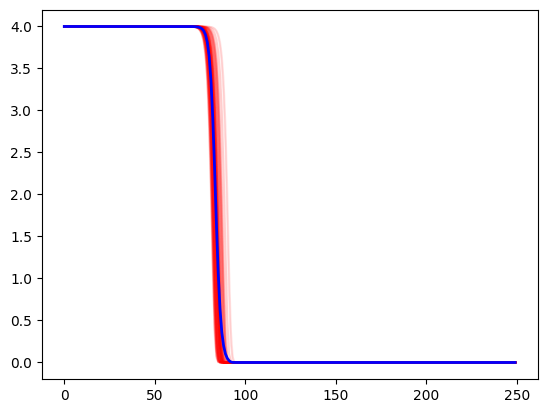

In [29]:
n_ensemble = 100
loss_all = np.zeros((n_ensemble, n_epochs))
loss_ens = np.zeros(n_epochs)

for i in range(n_ensemble):
    SEED = 2021 + i
    mu.set_seed(seed=SEED)
    
    model_ens = Model1()
    mu.initializer_(model_ens, gamma, trunc=True)

    loss_all[i,:] = train(model_ens, x, y, lr, print_grad=False)
    
loss_ens = np.mean(loss_all, axis=0)

[plt.plot(l, alpha=0.1, color='r') for l in loss_all]
plt.plot(loss_ens, color='b', linewidth=2)
plt.show()

Making model 6


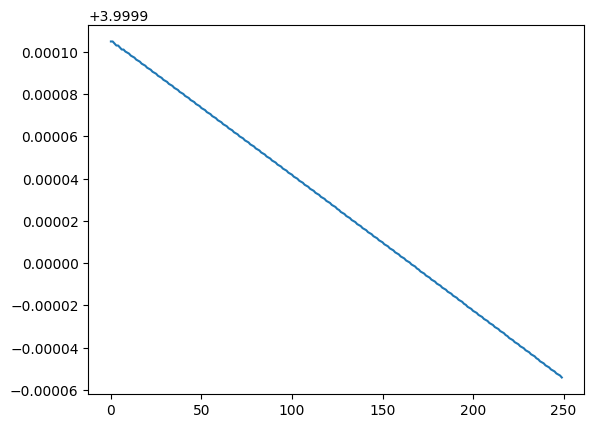

In [39]:
class Model6(nn.Module):
    def __init__(self, n_ensembles):
        super().__init__()
        print('Making model 6')
        self.n_ensembles = n_ensembles
        self.nets = nn.ModuleList([nn.Sequential(OrderedDict([('w1', nn.Linear(1,1, bias=False)), 
                                                              ('w2', nn.Linear(1,1, bias=False))])) 
                                   for _ in range(n_ensembles)])

    def forward(self, x):
        out = torch.Tensor([[0.0]])
        for net in self.nets:
            out = torch.add(net.forward(x), out)
        out = out/self.n_ensembles
        return out
    
model6 = Model6(n_ensembles=10000)

mu.initializer_(model6, weight_large/n_ensemble)
# for weight in model6.parameters():
#     print(weight.data)

loss = train(model6, x, y, lr*10)
plt.plot(loss)
plt.show()

# for p in model6.parameters():
#     print(p.data)